In [1]:
import numpy as np
import pickle

In [2]:
with open('results_1024/sample_100.p', 'rb') as f:
    vae_samples = pickle.load(f)
    

In [5]:
prots = """ANLNGTLMQYFEWYMPNDGQHWKRLQNDSAYLAEHGITAVWIPPAYKGTSQADVGYGAYDLYDLGEFHQKGTVRTKYGTKGELQSAIKSLHSRDINVYGDVVINHKGGADATEDVTAVEVDPADRNRVISGEHLIKAWTHFHFPGRGSTYSDFKWHWYHFDGTDWDESRKLNRIYKFQGKAWDWEVSNENGNYDYLMYADIDYDHPDVAAEIKRWGTWYANELQLDGFRLDAVKHIKFSFLRDWVNHVREKTGKEMFTVAEYWQNDLGALENYLNKTNFNHSVFDVPLHYQFHAASTQGGGYDMRKLLNGTVVSKHPLKSVTFVDNHDTQPGQSLESTVQTWFKPLAYAFILTRESGYPQVFYGDMYGTKGDSQREIPALKHKIEPILKARKQYAYGAQHDYFDHHDIVGWTREGDSSVANSGLAALITDGPGGAKRMYVGRQNAGETWHDITGNRSEPVVINSEGWGEFHVNGGSVSIYVQR
DGLNGTMMQYYEWHLENDGQHWNRLHDDAAALSDAGITAIWIPPAYKGNSQADVGYGAYDLYDLGEFNQKGTVRTKYGTKAQLERAIGSLKSNDINVYGDVVMNHKMGADFTEAVQAVQVNPTNRWQDISGAYTIDAWTGFDFSGRNNAYSDFKWRWFHFNGVDWDQRYQENHIFRFANTNWNWRVDEENGNYDYLLGSNIDFSHPEVQDELKDWGSWFTDELDLDGYRLDAIKHIPFWYTSDWVRHQRNEADQDLFVVGEYWKDDVGALEFYLDEMNWEMSLFDVPLNYNFYRASQQGGSYDMRNILRGSLVEAHPMHAVTFVDNHDTQPGESLESWVADWFKPLAYATILTREGGYPNVFYGDYYGIPNDNISAKKDMIDELLDARQNYAYGTQHDYFDHWDVVGWTREGSSSRPNSGLATIMSNGPGGSKWMYVGRQNAGQTWTDLTGNNGASVTINGDGWGEFFTNGGSVSVYVNQ
ASLNGTLMQYFEWYMPNDGQHWKRLQNDSAYLAEHGITAVWIPPAYKGTSQDDVGYGAYDLYDLGEFHQKGTVRTKYGTKGELQSAINSLHSRDINVYGDVVINHKGGADATEDVTAVEVDPADRNRVTSGEQRIKAWTHFQFPGRGSTYSDFKWYWYHFDGTDWDESRKLNRIYKFQGKAWDWEVSNENGNYDYLMYADIDYDHPDVTAEIKRWGTWYANELQLDGFRLDAVKHIKFSFLRDWVNHVREKTGKEMFTVAEYWQNDLGALENYLNKTNFNHSVFDVPLHYQFHAASTQGGGYDMRKLLNGTVVSKHPVKAVTFVDNHDTQPGQSLESTVQTWFKPLAYAFILTREAGYPQIFYGDMYGTKGASQREIPAMKHKIEPILKARKQYAYGAQHDYFDHHNIVGWTREGDSSVANSGLAALITDGPGGTKRMYVGRQNAGETWDDITGNRSDSVVINAEGWGEFHVNGGSVSIYVQR
ETANKSNELTAPSIKSGTILHAWNWSFNTLKLNMKDIHDAGYTAIQTSPINQVKEGNQGDKSMSNWYWLYQPTSYQIGNRYLGTEQEFKEMCAAAEEYGIKVIVDAVINHTTSDYAAISNEVKSIPNWTHGNTQIKNWSDRWDVTQNSLLGLYDWNTQNTQVQSYLKRFLERALNDGADGFRFDAAKHIELPDDGSYGSQFWPNITNTSAEFQYGEILQDSASRDAAYANYMDVTASNYGHSIRSALKNRNLGVSNISHYASDVSADKLVTWVESHDTYANDDEESTWMSDDDIRLGWAVIASRSGSTPLFFSRPEGGGNGVRFPGKSQIGDRGSALFEDQAITAVNRFHNVMAGQHEELSNPNGNNQIFMNQRGSHGVVLANAGSSSVSINTATKLPDGRYDNKAGAGSFQVNDGKLTGTINARSVAVLYPDDIEIRCNTFFQ
ETANKSNELTAPSIKSGTILHAWNWSFNTLKHNMKDIHDAGYTAIQTSPINQVKEGNQGNKSMSNWYWLYQPTSYQIGNRYLGTEQEFKEMCAAAEEYGIKVIVDAVINHTTSDYAVISNEIKSIPNWTHGNTQIKNWSDRWDVTQNSLLGLYDWNTQNTQVQSYLKRFLERALNDGADGFRFDAAKHIELPDDGSYGSQFWPNITNTSAEFQYGEILQDSASRDAAYANYMNVTASNYGHSIRSALKNRNLGVSNISHYASDVSADKLVTWVESHDTYANDDEESTWMSDDDIRLGWAVIASRSGSTPLFFSRPEGGGNGVRFPGKSQIGDRGSALFEDQAITAVNRFHNVMAGQPEELSNPNGNNQIFMNQRGSHGVVLANTGSSSVSINTPTKLPNGRYDNKAGAGSFQVNDGKLTGTINARSVAVLYPDDIAKAPHVFLENYKTGVTHSFNDQLTITLRADANTTKAVYQINNGPETAFKDGDQFTIGKGDPFGKTYTIMLKGTNSDGVTKTEEYSFVKRDPASAKTIGYQNPNHWSQVNAYIYKHDGGRAIELTGSWPGKPMTKNADGIYTLTLPVDTDTTNAKVIFNNGSAQVPGQNQPGFDYVQNGLYNDSGLSGSLPH
ADERELKDELIYDVLVDRYFNKKIDNDYEVNALDPASFNGGDFDGMASELLFVKEMGFTALSIGPVFSTATYDGKRVLDYTKFERHFGTKEEFEELVAEIHDQDMKVIVDVPTQQVSEEHVWVAENPDWFTENEDGSLALDTSNLEAQEALISTFTEFSETYEIDGFRLQNADQLDESFVSDFSDAIKDVRDSYILSDREMAEMPGVDAVVLPGVEETLRAAYKNFDQDLTGISSIMEESEDNLIQVDSLIGSRFTADIVEENGFPPTRWTLLLTQLLTMPGIPVVQYGSESAMNGTELPESHQILDLAVDKELVDHITDLTSLRNSSEALRTGELEILHDEDGWLVYKRSNDEETWIIAINNSSVTKNINLPAEVIGEGQEMRGLFESDIIRQEDNGEYRLTQDREIAEVFHVTEETKLNSAYIAVLAIMYVVFMLFLWVVWRKGKQRKADAAKQKANEKTV
EKEYELKDELIYDVLVDRYFNKKIDNDYEVNALDPTTFNGGDFDGMASELLFVKDMGFTALSIGSVFSTETYDGKKVLDYTEFERHFGTKEEFQTLVEEIHEQDMKVIVDIPTQQVSANHIWAVENPQWFTKNEDGSLAIDTSNLEVQKALITTFTEFNETYQVDGFRLQDADKIDSQFVRDFSKAMKDIRPSYILSDREMSEKTGFDAVVIPGVEETLRAAYKNFDQDLTGIKTLMKQSENQLIQVDSLLGSRFTSDIVEVKGFPPTRWKLLLTQLLTMPGIPVIQYGSESAMNGVAPSESHQILDMAVDKELVDHITNLTSLRNSSEALRTGKVEVLHDEDGWLVYKRSNDDETWVIAINNSSSTKTINLSADVIGENQELQGLFESDIVRQEDSGDYRVTQDREIAEVFHVREETKLNTAYIATLAIMYIVFMLFLWFVWRKGKQRKADAAK
EEKREWRDEVIYSIMIDRFNNGESKNDKQLDVGNLEGYQGGDIRGIIKRLDYIKEMGFTTIMLSPLFESEKYDGLSVRNFQKANEHFGTENDVKELVNEAHKKGMKVVFQFPYEENEQQLIDSMKWWIKEVDLDGSYVIHSEKKPRAFWDEVQKDLQKVKKDFHIMTKEDNEYYKKIVESFSKADMSVKPLYDVSGKEEEFATFLDNQETKRFARIAKENMYYPPSRLKLAITYLLTSPGIPNFYYGTEIALDGGDAPDNRRLMDFKSDEKFMQHITKLGELRQTRPSLRRGTFELLYDKDGMSILKRKYKDEVTLVAINNTKKTQKVSLPVSAIGEKQELRGLLEDEIIREENGKFYLVLKREESNVYKVSEETGVNWLFISLIVGVNVLFIAFLIAVKKKRSSV
ADWQDDAIYYVMVDRFYNGNTQNDQEVNIDDMNTYQGGDFAGITEKLDYIKEMGFTAIALNPVIQNMNGDYTGGSPHDFTAVNENYGTMEELRKLVKEAHDRDMKIMLDFQVNHVGEGHPWLEENGKKDWFHEERAITENGQTDKQETGWLDGKPDLAQENPEVSSYLIDAAKWWIKETGIDGYRLIYMNYVPQSFWEEMISAIREDRPDFFFIGDVDADKAEKLGIGMLDEEQMTGMREAFSTTDVEMDSLFKRWETLFGALNTPYTTGISVDTERTERFTKETERAKQFPGTRWKMALTYMYTMPGIPVVTYGSEIALNGGEKPDNHRMMNFRTDEELIDYMKQLSALRKEYPALRTGDLELLQSEDGMVVFKRETEEQTMIAAINNSSKTKTIQLDSAFIQDNQELRGKLNTDLVREQNGTFSITLEREMAEVYLVEKESGINYGFLAVLILVPIAFILFLILARKRGRQTN
KEETPEIQNESIYDVLIDRFFDKNVENDYNINAKDPKAFHGGDFDGIATKLSYFQDLGFTMLSLGSVFSSETYDGQAVVDYNKIERHFGTGKEFSSLIGTLHKNHIKTMADFPINNVSKNHAWVLEKGHQDWYELANSDRINWNTSNTAVQDALVQAAVDFVGKYKVDGIRLTELGKANTEFLNKMITALKQKNKDLYVITNEPSYADFDLKVNKDTIDTYQSIFKNVDQDSSQLEKPLGNSINDTSQKPVALMLDDLYSARFTHASAEENMFPPTRIKVALGAIMTLPGVPIVSYGTEIAQNGVTTDESHAPMDFRTKDDIISYIEDLQSVRNKSKALRTGKFKLLENKDGLMVYERYAGKEKWIIVVNNTDKTKRYVLDPSVIGNNKELHGIFEKDIVRQQKEDEKYNIVLDRELVEFYQVTDHKGINIPYMIALGLVYVIFITFIVLLLRRGRRGKKA
AAPFNGTMMQYFEWYLSCDPQSFSEPPQCEVKVANLGITALWLPPAYKGTSRSDVGYGVYDLYDLGEFNQKGAVRTKYGTKAQYLQAIQAAHAAGMQVYADVVFNHKGGADGTEWVLQISWWVDAVNQEISGTYQIQAWTKFDFPGRGNTYSSFKWRWYHFDGVDWDESRKLSRIYKFRGIGKAWDFHFAYFEKAYYDSTENGDIDDHPEVVTELKSWGKWYVNTTNIDGFRLDAVKHIDFSFFPDWLSDVRSQTGKPLFTVGEYWSYDINKLHNYIMKTNGTMSLFDAPLHFHDRTASKSGDAYDMRTLMTNTLMKDQPTLAVTFVDNHDTEPGQALQSWVDPWFKPLAYAFILTVIDRRRDGYGGDYYGIPQYNPSLKSKIDPLLIARRDYAYGTGHDYLDHSHDIIGWTREGVTEKPGSGLAALITDGPGGSKWMYVGKQHAGGNRTTVGGMETALTNGSSCDRQEGYPCVFYVSVWVPRKTTVSTIAWSITTRPWTDEFVRWTEPRLVAWP
AAPFNGTMMQYFEWYLPDDGTLWTKVANEANNLSSLGITALWLPPAYKGTSRSDVGYGVYDLYDLGEFNQKGTVRTKYGTKAQYLQAIQAAHAAGMQVYADVVFDHKGGADGTEGVDAVEVNPSDCNQEFSGTYQIQAWTKFDFPGRGNTYSSFKWRWYHFDGVDWDESRKLSRIYKFRGIGKAWDWEVDTENGNYDYLMYADLDMDHPEVVTELKNWGKWYVNTTNIDGFRLDAVKHIKFSFFPDWLSYVRSQTGKPLFTVGEYWSYDINKLHNYITKTDGTMSLFDAPLHNKFYTASKSGGAFDMRTLMTNTLMKDQPTLAVTFGDNHDTEPGQALQSWVDPWFKPLAYAFILTRQEGYPCVFYGDYYGIPQYNIPSLKSKIDPLLIARRDYAYGTQHDYLDHSDIIGWTREGGTEKPGSGLAALITDGPGGSKWMYVGKQHAGKVFYDLTGNRSDTVTINSDGWGEFKVNGGSVSVWVPRKTTVSTITRPITTRPWTGEFVRWTEPRLVAWP
AQDFRARAPEDEVIYFVLPDRFENGDKANDRGGMTGDRLAHGFDPTAKGFYHGGDLKGLMARLPYIQSLGATAIWVGPIFRNKAVQGGPGNESAGYHGYWVTDFTRVDPHLGTNADFKALVDAAHARGMKVYMDIIANHTADVIQYRECAGKRECAYRSRADYPYAAKGKNKGFAGDGVQTAENFAKLTDPSFAYTPFVPAAERSVKAPAWLNDPIYYHNRGNTTFSNESSQMGDFVGLDDLMTENPRVLAGMIDIFGGWIDRFGIDGYRIDTARHVNPEFWAAFVPAMQARAKARGIPNFHVFGEVALSSLDAGGLAVWTKTGKFPAVLDFSFREAVLQSVAGTKGTDVFETVFDGDVLYAGGEATARQLPTFTGNHDNGRFAFYLRQARPQASDAEILSRVMLSNAMLLSLRGVPTIYSGDEQGFAGDGNDQDAREDMFASQVASYNDNKLVGTTATTATANFAPTHPLYRQIAQLAKLRTSTPALTRGRQLLRAREDKPGLLAISRFDPTSNAEVLLLFNTANAAITRNVQVETASTRFRALTGRCGTVTAPGAIRVDLPALGYAVCAAETR
VDGKSMNPGYKTYLMAPLKKVTDYTTWEAFENDLRKAKQNGFYAVTVDFWWGDMEKNGDQQFDFSYAQRFAQAARNAGIKIVPIISTHQCGGNVGDDCNVPLPSWVWNLKSDDSLYFKSETGTTNKETLSPLATDVISKQYGELYTAFAQALAPYKDVIAKIYLSGGPAGEIRYPSYTAADGTGYPSRGKFQVYTNFAKSKFQSYALTKYGSLAGINQAWGTNLTSASQILPPSDGYQFLKDGYSTAYGKDFLAWYQGALEDHTKRIGQLAHQAFDSTFNVPIGAKVAGIHWQYNNPTIPHAAEKPAGYNDYNALLDAFKTAKLDITFTCLEMTDSGNYPEYSMPKTLVRQVAGIANAKGVVLNGENALTIGSEDQYKKAAEMAFNYNFAGFTLLRFYDVINNDTLMGQFKNTLGVTPLAQTVVVKNAPTALGETVYIVGDRAELGQWDTSIYPIKLTYNSSTADWRGTVYFPASQNVQFKAIVKRADGSLKAWQPSQQYWSVPSTTTTYTDNW
HHNGTNGTMMQYFEWHLPNDGNHWNRLRDDAANLKSKGITAVWIPPAWKGTSQNDVGYGAYDLYDLGEFNQKGTVRTKYGTRSQLQGAVTSLKNNGIQVYGDVVMNHKGGADGTEMVNAVEVNRSNRNQEISGEYTIEAWTKFDFPGRGNTHSNFKWRWYHFDGTDWDQSRQLQNKIYKFRGTGKAWDWEVDIENGNYDYLMYADIDMDHPEVINELRNWGVWYTNTLNLDGFRIDAVKHIKYSYTRDWLTHVRNTTGKPMFAVAEFWKNDLAAIENYLNKTSWNHSVFDVPLHYNLYNASNSGGYFDMRNILNGSVVQKHPIHAVTFVDNHDSQPGEALESFVQSWFKPLAYALILTREQGYPSVFYGDYYGIPTHGVPSMKSKIDPLLQARQTYAYGTQHDYFDHHDIIGWTREGDSSHPNSGLATIMSDGPGGNKWMYVGKHKAGQVWRDITGNRSGTVTINADGWGNFTVNGGAVSVWVKQ
SPNPTNIHTGKTLRLLYHPASQPCRSAHQFMYEIDVPFEEEVVDISTDITERQEFRDKYNPTGQVPILVDGEFTVWESVAIARYVNEKFDGAGNWFGRGTQERAQINQFLQWYAYTLRLGGGAFHWNIFGCLIYGEKPYSPKFTAEQNKGRTLLYEAMGTLENYWLRDREYVCGDEVSYADLAAFHEFVSHEAGKIIPDRVWQGFPKIAAWFKKLSERPHAKTVSEWQYTNVGKIIRGELTASMFKRKTAVLKGTEVFSGHNHGIPYLNEKAEDYFKRVEKEGAAVA
TELILDFNKVQMRSQQLAPGVYAHLPADSAELNAKGGVAGTSGGLIVGTRGAMLIETMLNRRLFDQVQALAKKEALGLPLLYAVNTSYHGDHSYGNMYLKAPTRVIQSTKTRDYVDGHLADDKAFMVKNFGAGRGVEQITARTGDILVPPGGRVSVDLGGKTVEIIDFGFAQTGGDLFVWEPQSKVMWTGNAVVASKPALPWLLDGKLVETLATLQKVYDFLPPDATIVPGHGVPMAREGLRWHLDYLAAVQAGVKDALARKLSLEQTVTELKMPEFRGYVLFDWVHPDLNVPAAYKDLAARI
TYTEIVTGSTPDDRFDNLAGYPSAPHYVDVTAGDTGPLRMHYVDEGPRDGTPVVLLHGEPTWSYLYRTMIPPLAAGGCRVLAPDLIGFGRSDKPSRIEDYTYLRHVEWVTSWFEALDLSDTTIFVQDWGSLIGLRIAAEQGVRVGRIVVANGFLPAGQTSANLPFRLWRAFARYTPVLPAGRIVAFGTVTDVPARVRAGYDAPFPGKRFQAGARAFPALVPTSPDDPALPANRAAWEALGRWEKPFLCVFGAKDPILGRADRPLIEHVPGAAGQPHARINGSHFVQEDCGPELAERILQWSTNPA
AGNITPTLANWSTWETFKAAQQEIVLPAGRVVHIAVTIRYVDIGEPRWGTILLMHGIPTWGCLYHAIIPPLAQAGYRVIAPDFLGHGWSDRRDRFDRSFQDQARMVTALLDTLQLGSVDVVGHDTGGAVALILAIEHKVRVNRLVICNSVCSDRFDDDMLDFGHPLRWKPRPVADLVAVLEESLAAGLSNQNRLTLEFRAGIIAPWASEEGKLSLLRNASALNANQTVALVDRHGEITAPTLVLWGMDDPWQRADDGKRLAREIPRAVFQAIEGASHWVQQGARAIHRCPAGFLRQCAGFCRVAEWERIWSTVLWPCR
DVLRTPDERFEGLADWSFAPHYTEVTDADGTALRIHHVDEGPKDQRPILLMHGEPSWAYLYRKVIAELVAKGHRVVAPDLVGFGRSDKPAKRTDYTYERHVAWMSAWLEQNDLKDIVLFCQDWGGLIGLRLVAAFPERFSAVVVSNTGLPIGVGKSEGFEAWLNFSQNTPELPVGFILNGGTARDLSDAERSAYDAPFPDESYKEGARIFPALVPITPEHASVEENKAAWAVLETFDKPFVTAFSDADPITRGGEAMFLARVPGTKNVAHTTLKGGHFVQEDSPVEIAALLDGLVAGLPQA
SEIGTGFPFDPHYVEVLGERMHYVDVGPRDGTPVLFLHGNPTSSYLWRNIIPHVAPSHRCIAPDLIGMGKSDKPDLDYFFDDHVRYLDAFIEALGLEEVVLVIHDWGSALGFHWAKRNPERVKGIACMEFIRPIPTWDEWPEFARETFQAFRTADVGRELIIDQNAFIEGALPKFVVRPLTEVEMDHYREPFLKPVDREPLWRFPNELPIAGEPANIVALVEAYMNWLHQSPVPKLLFWGTPGVLISPAEAARLAESLPNCKTVDIGPGLHFLQEDNPDLIGSEIARWLPALIVGKSIEFDGGWAT
ENMSTTYPIVLVHGLSGFDDIVGYPYFYGIRDALEKDGHKVFTASLSAFNSNEVRGEQLWEFVQKVLKETKAKKVNLIGHSQGPLACRYVAAKHAKNIASVTSVNGVNHGSEIADLVRRIMRKDSVPEYIADAVMKAIGTIISTFSGNRGNPQDAIAALEALTTENVMEFNKKYPQGLPAIRGGEGKEVVNGVHYYSFGSYIQGLIAGEKGNLLDPTHAAMRVLSAFFTERENDGLVGRTSMRLGKLIKDDYAEDHLDMVNQVAGLVGPGEDIVAIYTNHANFLASKKL
ATSRANDAPIVLLHGFTGWGREEMFGFKYWGGVRGDIEQWLNDNGYRTYTLAVGPLSSNWDRACEAYAQLVGGTVDYGAAHAAKHGHARFGRTYPGLLPELKRGGRIHIIAHSQGGQTARMLVSLLENGSQEEREYAKAHNVSLSPLFEGGHHFVLSVTTIATPHDGTTLVNMVDFTDRFFDLQKAVLEAAAVASNAPYTSEIYDFKLDQWGLRREPGESFDHYFERLKRSPVWTSTDTARYDLSVPGAETLNRWVKASPNTYYLSFSTERTYRGALTGNYYPEFGMNAFSAIVCAPFFGSYRNAALGIDSHWLENDGIVNTISMNGPKRGSSDRIVPYDGALKKGVWNDMGTYNVDHLEIIGVDPNPSFDIRAFYLRLAEQLASLRP
AEHNPVVMVHGIGGASFNFAGIKSYLVSQGWSRDKLYAVDFWDKTGTNYNNGPVLSRFVQKVLDETGAKKVDIVAHSMGGANTLYYIKNLDGGNKVANVVTLGGANRLTTGKALPGTDPNQKILYTSIYSSADMIVMNYLSRLDGARNVQIHGVGHIGLLYSSQVNSLIKEGLNGGGQNTN
ESVHNPVVLVHGISGASYNFFAIKNYLISQGWQSNKLYAIDFYDKTGNNLNNGPQLASYVDRVLKETGAKKVDIVAHSMGGANTLYYIKYLGGGNKIQNVVTLGGANGLVSSTALPGTDPNQKILYTSIYSLNDQIVINSLSRLQGARNIQLYGIGHIGLLSNSQVNGYIKEGLNGGGLNTN
SPIRREVSQDLFNQFNLFAQYSAAAYCGKNNDAPAGTNITCTGNACPEVEKADATFLYSFEDSGVGDVTGFLALDNTNKLIVLSFRGSRSIENWIGNLNFDLKEINDICSGCRGHDGFTSSWRSVADTLRQKVEDAVREHPDYRVVFTGHSLGGALATVAGADLRGNGYDIDVFSYGAPRVGNRAFAEFLTVQTGGTLYRITHTNDIVPRLPPREFGYSHSSPEYWIKSGTLVPVTRNDIVKIEGIDATGGNNQPNIPDIPAHLWYFGLIGTCL
GLFGSTGYTKTKYPIVLTHGMLGFDSILGVDYWYGIPSSLRSDGASVYITEVSQLNTSELRGEELLDQVEEIAAISGKGKVNLIGHSHGGPTVRYVAAIRPDLVASVTSVGAPHKGSDTADFLRQIPPGSAGEALVAGIVNGLGTLINFLSGSPSTTPQNALGALESLNSQGAAVFNAKYPQGIPTSACGEGAYKVNGVSYYSWSGTSPLTNILDVSDLLMGASSLTFDEANDGLVGRCSSHLGKVIRDNYRMNHLDEVNQVFGLTSLFETDPVTVYRQQANRLKLAG
ATGSGYTATKYPIVLAHGMLGFDSLLGIDYWYGIPSALRRDGAQVYVTEVSQLNTSELRGEELLAQVEEIVAISGKPKVNLIGHSHGGPTIRYVAGVRPDLIASVTSVGAPHKGSDVADLIRKVPEGSSGEAIIAGLVNAMGAFINFVSGSSSTAPQNSLGSLESLNSEGAARFNAKFPQGIPTTACGEGAYKVNGVHYYSWSGTSPLTNPLDVSDAMMGAGSLAFSGPNDGLVGRCSSHLGMVIRDNYRMNHLDEVNQFMGLTSLFETDPVSVYRQHANRLKNAGL
SPVRREVSQDLFDQFNLFAQYSAAAYCAKNNDAPAGANVTCRGSICPEVEKADATFLYSFEDSGVGDVTGFLALDNTNRLIVLSFRGSRSLENWIGNINLDLKGIDDICSGCKGHDGFTSSWRSVANTLTQQVQNAVREHPDYRVVFTGHSLGGALATVAGASLRGNGYDIDVFSYGAPRVGNRAFAEFLTAQTGGTLYRITHTNDIVPRLPPRELGYSHSSPEYWITSGTLVPVTKNDIVKVEGIDSTDGNNQPNTPDIAAHLWYFGLIGTCL
TTAMPSDAAIVALCAQIYQPSAPDAFEYFDAGTDDGICWAIKRLNGLDVVVLRGSRTLQDWLRDIHAFPAPSRIGHVHSGFYAGMEHMWSDLKRLLEQPAIVTGHSLGAARAAVLTALMTVDHVPPVARVVFGEPKPGLLDFAQLITRIPGRSYRNGDDTHHDLVTDVPFSFPPMQYVHPTPIIPVCAEPSGDLFSTMGVFAYHHVELYQAALAVQPQEKVA
AFDALFARDVALPLAAAAYSVLGGSPAVLPTGFVKTALIRADGAALTAMTDPHPAVTAMTKDTDLFGLLGHNPASRTAFVSFRGSADLADWLADIDALPQPYLPIAGFGHVHAGFQQVYELVRDSVAANLAAATAGTDQILVTGHSLGAALAVLAAPDVCRNMPPNTIEPRLVTFAGPRVGLSDFAAAFNAAIESCYRVVNFLDIVPHVPPSPYVHVGVEIDVDSGGAIDVAWRHSLTAYRDGLTALIAAASA
AEEKVKYLIGFEEEAELEAFTEEIDQVGVFSVEEQSVAEDTLDIDVDIIDEYDYTDVLAVELDPEDVDALSEEAGISFIEEDIELSIQQTVPWGITRVQAPAVHNRGITGSGVRVAILDSGISAHSDLNIRGGASFVPGEPTTADLNGHGTHVAGTVAALNNSIGVIGVAPNAELYAVKVLGANGSGSVSGIAQGLEWAATNNMHIANMSLGSDFPSSTLERAVNYATSRDVLVIAATGNNGSGSVGYPARYANAMAVGATDQNNRRANFSQYGTGIDIVAPGVNVQSTYPGNRYVSMNGTSMATPHVAGAAALVKQRYPSWNATQIRNHLKNTATNLGNSSQFGSGLVNAEAATR
AGKSSTEKKYIVGFKQTMSAMSSAKKKDVISEKGGKVQKQFKYVNAAAATLDEKAVKELKKDPSVAYVEEDHIAHEYAQSVPYGISQIKAPALHSQGYTGSNVKVAVIDSGIDSSHPDLNVRGGASFVPSETNPYQDGSSHGTHVAGTIAALNNSIGVLGVAPSASLYAVKVLDSTGSGQYSWIINGIEWAISNNMDVINMSLGGPTGSTALKTVVDKAVSSGIVVAAAAGNEGSSGSTSTVGYPAKYPSTIAVGAVNSSNQRASFSSAGSELDVMAPGVSIQSTLPGGTYGAYNGTSMATPHVAGAAALILSKHPTWTNAQVRDRLESTATYLGNSFYYGKGLINVQAAAQ
AGKSNGEKKYIVGFKQTMSTMSAAKKKDVISEKGGKVQKQFKYVDAASATLNEKAVKELKKDPSVAYVEEDHVAHAYAQSVPYGVSQIKAPALHSQGYTGSNVKVAVIDSGIDSSHPDLKVAGGASMVPSETNPFQDNNSHGTHVAGTVAALNNSIGVLGVAPSASLYAVKVLGADGSGQYSWIINGIEWAIANNMDVINMSLGGPSGSAALKAAVDKAVASGVVVVAAAGNEGTSGSSSTVGYPGKYPSVIAVGAVDSSNQRASFSSVGPELDVMAPGVSIQSTLPGNKYGAYNGTSMASPHVAGAAALILSKHPNWTNTQVRSSLENTTTKLGDSFYYGKGLINVQAAAQ
DSASAAQPAKNVEKDYIVGFKSGVKTASVKKDIIKESGGKVDKQFRIINAAKAKLDKEALKEAKNDPDVAYVEEDHVAHALAQTVPYGIPLIKADKLHAQGFKGANVKGAVLATGIPTSHPDLNVVGGASFVAGEAYNTDGNGHGTHVAGTVAALDNTTGVLGVAPSVSLYAVKVLNSSGSGSYSGIVSGIEWATTNGMDVINMSLGGASGSTAMKQAVDNAYAKGVVVVAAAGNSGSSGNTNTIGYPAKYDSVIAVGAVDSNSNRASFSSVGAELEVMAPGAGVYSTYPTNTYATLNGTSMASPHVAGAAALILSKHPNLSASQVRNRLSSTATYLGSSFYYGKGLINVEAAAQ
AEEAKEKYLIGFNEQEAVSEFVEQVEANDEVAILSEEEEVEIELLHEFETIPVLSVELSPEDVDALELDPAISYIEEDAEVTTMAQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRGGASFVPGEPSTQDGNGHGTHVAGTIAALNNSIGVLGVAPNAELYAVKVLGASGSGSVSSIAQGLEWAGNNGMHVANLSLGSPSPSATLEQAVNSATSRGVLVVAASGNSGAGSISYPARYANAMAVGATDQNNNRASFSQYGAGLDIVAPGVNVQSTYPGSTYASLNGTSMATPHVAGAAALVKQKNPSWSNVQIRNHLKNTATSLGSTNLYGSGLVNAEAATR
ASTDYWQNWTDGGGIVNAVNGSGGNYSVNWSNTGNFVVGKGWTTGSPFRTINYNAGVWAPNGNGYLTLYGWTRSPLIEYYVVDSWGTYRPTGTYKGTVKSDGGTYDIYTTTRYNAPSIDGDRTTFTQYWSVRQTKRPTGSNATITFSNHVNAWKSHGMNLGSNWAHQVMATEGYQSSGSSNVTVW
SPVDIDSRQASVSIDAKFKAHGKKYLGTIGDQYTLTKNSKNPAIIKADFGQLTPENSMKWDATEPNRGQFSFSGSDYLVNFAQSNGKLIRGHTLVWHSQLPGWVSSITDKNTLISVLKNHITTVMTRYKGKIYAWDVLNEIFNEDGSLRNSVFYNVIGEDYVRIAFETARSVDPNAKLYINDYNLDSAGYSKVNGMVSHVKKWLAAGIPIDGIGSQTHLGAGAGANVAGALNALAGAGTTEIAITELDIAGASSTDYVNVVKACLNQSKCVGITVWGVADPDSWRSSSSPLLFDSNYNPKAAYNAIANAL
RTITNNEMGNHSGYDYELWKDYGNTSMTLNNGGAFSAGWNNIGNALFRKGKKFDSTRTHHQLGNISINYNASFNPGGNSYLCVYGWTQSPLAEYYIVDSWGTYRPTGAYKGSFYADGGTYDIYETTRVNQPSIIGIATFKQYWSVRQTKRTSGTVSVSAHFRKWESLGMPMGKMYETAFTVEGYQSSGSANVMTNQLFIGN
ATTITSNQTGTQDGYDYELWKDSGNTSMTLNSGGAFSAQWSNIGNALFRKGKKFDSTKTHSQLGNISINYNATFNPGGNSYLCVYGWTKDPLTEYYIVDNWGTYRPTGTPKGTFTVDGGTYDIYETTRINQPSIIGIATFKQYWSVRQTKRTSGTVSVSEHFKKWESLGMPMGKMYETALTVEGYQSNGSANVTANVLAISGKSF
FPSGLTQHATGDLSKRQSITTSQTGTNNGYYYSFWTNGGGEVTYTNGDNGEYSVTWVNCGDFTSGKGWNPANAQTVTYSGEFNTSGNAYLAVYGWTTDPLVEYYILESYGTYNPSSGLTLLGQVTSDGGTYDIYSTQRVDQPSIEGTSTFNQYWSVRTEKRVGGTVTTANHFAAWKALGLEMGTYNYMIVSTEGYESSGSSTITVS"""
prots = prots.split('\n')
prots[0]

'ANLNGTLMQYFEWYMPNDGQHWKRLQNDSAYLAEHGITAVWIPPAYKGTSQADVGYGAYDLYDLGEFHQKGTVRTKYGTKGELQSAIKSLHSRDINVYGDVVINHKGGADATEDVTAVEVDPADRNRVISGEHLIKAWTHFHFPGRGSTYSDFKWHWYHFDGTDWDESRKLNRIYKFQGKAWDWEVSNENGNYDYLMYADIDYDHPDVAAEIKRWGTWYANELQLDGFRLDAVKHIKFSFLRDWVNHVREKTGKEMFTVAEYWQNDLGALENYLNKTNFNHSVFDVPLHYQFHAASTQGGGYDMRKLLNGTVVSKHPLKSVTFVDNHDTQPGQSLESTVQTWFKPLAYAFILTRESGYPQVFYGDMYGTKGDSQREIPALKHKIEPILKARKQYAYGAQHDYFDHHDIVGWTREGDSSVANSGLAALITDGPGGAKRMYVGRQNAGETWHDITGNRSEPVVINSEGWGEFHVNGGSVSIYVQR'

In [6]:
len(prots)

41

In [17]:
with open("training_losses.txt","r") as f:
    lines = f.readlines()

trains, tests = [], []
for line in lines:
    _splitline = line.split("\t")
    trains.append(float(_splitline[1].strip()))
    tests.append(float(_splitline[-1].strip()))


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

(-2, 200)

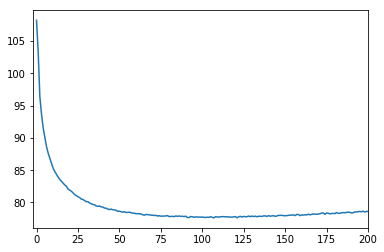

In [24]:
%matplotlib inline
x = [i for i in range(len(trains))]
# sns.lineplot(x, trains)
sns.lineplot(x, tests)
plt.xlim(-2,200)

In [30]:
tests[100]

77.742

In [27]:
tests.index(min(tests))

107

In [ ]:
# Decided on index 100

In [7]:
with open('results_1024/sample_100.p', 'rb') as f:
    vae_samples = pickle.load(f)
    

In [8]:
def parse_sample(seq):
    if '<END>' in seq:
        seq = seq[1:seq.index("<END>")]
    else:
        seq = seq[1:]
    
    out = "".join(seq).replace("<PAD>", "")
    return out
parse_sample(vae_samples[0])

'MLLLLLLLLLLQLPES'

In [40]:
for i in range(10):
    print(parse_sample(vae_samples[i]))

MLLLLLLLLLLQLPES
MAVGGAGLLPLRLVLLLLLLLLGCSG
MARSRRSSSLASLSLLLLAAVLAALLLFATASA
MKLLKIVLLLLFLSLALA
MGRLAILALVLVLVLAALVLA
MGLLLFVLLLLLGLVSG
MGLPALLRVFLLLLSLCLQLLLGGGSG
MRRLRARLLALAGALALLLLLLGGLRAGGA
MKKIIFLILLLIILIIIFLISSA
MKFLILALLFASLVSLLAA


In [9]:
import random

vae_seqs = [parse_sample(s) for s in vae_samples]

In [11]:
seqs_to_test = []
np.random.seed(2)

code_prefix = ">vae41_seq"

with open("outs/vae41_signalp_input.fa", "w") as f:
    for i, sp in enumerate(vae_seqs):
        # Write seq name
        code = code_prefix + str(i) + "\n"
        f.write(code)

        # Make construct from random choice
        _prot = random.choice(prots)
        _construct = sp + _prot + "\n"
        f.write(_construct)
        seqs_to_test.append(_construct.strip())

In [58]:
with open('results_1024/sample_640.p', 'rb') as f:
    vae_samples = pickle.load(f)

seqs_to_test = []
np.random.seed(2)

code_prefix = ">vae_seq640"

with open("outs/vae640_signalp_input.fa", "w") as f:
    for i, sp in enumerate(vae_seqs):
        # Write seq name
        code = code_prefix + str(i) + "\n"
        f.write(code)

        # Make construct from random choice
        _prot = random.choice(prots)
        _construct = sp + _prot + "\n"
        f.write(_construct)
        seqs_to_test.append(_construct.strip())

In [61]:
seqs_to_test[:10]

['MLLLLLLLLLLQLPESAEEAKEKYLIGFNEQEAVSEFVEQVEANDEVAILSEEEEVEIELLHEFETIPVLSVELSPEDVDALELDPAISYIEEDAEVTTMAQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRGGASFVPGEPSTQDGNGHGTHVAGTIAALNNSIGVLGVAPNAELYAVKVLGASGSGSVSSIAQGLEWAGNNGMHVANLSLGSPSPSATLEQAVNSATSRGVLVVAASGNSGAGSISYPARYANAMAVGATDQNNNRASFSQYGAGLDIVAPGVNVQSTYPGSTYASLNGTSMATPHVAGAAALVKQKNPSWSNVQIRNHLKNTATSLGSTNLYGSGLVNAEAATR',
 'MAVGGAGLLPLRLVLLLLLLLLGCSGAGKSNGEKKYIVGFKQTMSTMSAAKKKDVISEKGGKVQKQFKYVDAASATLNEKAVKELKKDPSVAYVEEDHVAHAYAQSVPYGVSQIKAPALHSQGYTGSNVKVAVIDSGIDSSHPDLKVAGGASMVPSETNPFQDNNSHGTHVAGTVAALNNSIGVLGVAPSASLYAVKVLGADGSGQYSWIINGIEWAIANNMDVINMSLGGPSGSAALKAAVDKAVASGVVVVAAAGNEGTSGSSSTVGYPGKYPSVIAVGAVDSSNQRASFSSVGPELDVMAPGVSIQSTLPGNKYGAYNGTSMASPHVAGAAALILSKHPNWTNTQVRSSLENTTTKLGDSFYYGKGLINVQAAAQ',
 'MARSRRSSSLASLSLLLLAAVLAALLLFATASAAEEAKEKYLIGFNEQEAVSEFVEQVEANDEVAILSEEEEVEIELLHEFETIPVLSVELSPEDVDALELDPAISYIEEDAEVTTMAQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRGGASFVPGEPSTQDGNGHGTHVAGTIAALNNSIGVLGVAPNAELYAVKVLGASGSGSVSSIAQGLEWAGNNGMHVANLSL

In [ ]:
# Transformer predictions

In [54]:
import pandas as pd

In [56]:
tdf = pd.read_excel('generated_sp_ids.xlsx')
transformer_sps = tdf['sequence'].values

In [57]:
seqs_to_test = []
np.random.seed(2)

code_prefix = ">transformer_seq"

count = 0
with open("outs/transformer_signalp_input.fa", "w") as f:
    for i, sp in enumerate(transformer_sps):
        # Write seq name
        
        for _prot in prots:
            code = code_prefix + str(count) + "\n"
            f.write(code)

            # Make construct from random choice
            _construct = sp + _prot + "\n"
            f.write(_construct)
            seqs_to_test.append(_construct.strip())
            count += 1

In [61]:
# for i in sample625:a
#     print("\"" + parse_sample(i) + "\",")

"MLRWLVLLASVLVCWSSLLAA",
"MGRRLAFPAGPAVL",
"MRPAALLAALCVALTAA",
"MPSLSIRFRVLILFLLLVCFHCSQS",
"MKKTLRALVIVVLVMALCISTEAA",
"MKSLLNMKKFWLIVIIILILLLFGLLVGNVFA",
"MARGLAVALLPLGFALA",
"MPPALLPLCRWTLPLRSEPSLG",
"MKVSLPSVFAALKLLALVLPWML",
"MNKISLLFFVVALFFILFVNG",
"MRFLVLLLLVSPSICSG",
"MARFRGTLWTLVLSLVALLTLA",
"MRKLLSIFFIILIFNGIFA",
"MASTKLKLCALIIAAILFVGLLLFC",
"MASSRLILLVVVLALVVWASA",
"MKKFILAVLLVVAVALSFAPAAE",
"MFNMGASLLRALVFLVLAMLVLTRS",
"MESAVLLPYLLLVSSALWLSGG",
"MNLCLLVFISLAIATICFG",
"MNLFKDLLLLLVAFATSNS",
"MKSSIKNLFILLILVLLLMFHFS",
"MNRKILLLLIIVLASAAYA",
"MKLFIFFLVFLIALFVFISVVKG",
"MLFLLLSLFLELGSVSG",
"MRPRLAALAALLLALGLLLAAQA",
"MKKMTNKKLGALSGAASLSLGGYA",
"MTHLSRQLPLRALAILAASYALLLLTKP",
"MSKLTVICLIALVLFVVFVISEG",
"MKFLRLLFLSLVVSLGLLGFTPASA",
"MKLSHGSFYKAPNKGLRLLIVLLLFCLFIPFSPLA",
"MKKLDILLYLALLKSITTG",
"MRRSTLLALSFLVLLLLLSLAEA",
"MKLSLLALLVVATLVSSGVWA",
"MVSKQWVSLRAVQLLLFLVVVEVSS",
"MASSSAPCCALLALLLLLLCVTIA",
"MNSLSVLLLLLTATGVRG",
"MKLLFFFGLLLASISFAVS",
"MTSKRSNVNLRHLCLLLSLLVMTPQGSG",
"MT

In [35]:
chars = [a for a in "ACDEFGHIKLMNPQRSTVWY"]
import random
random.choice(chars)

'V'

In [38]:
random.choice(chars)

'I'

In [41]:
cutinase = """GRTTRDDLINGNSASCRDVIFIYARGSTETGNLGTLGPSIASNLESAFGKDGVWIQGVGG
AYRATLGDNALPRGTSSAAIREMLGLFQQANTKCPDATLIAGGYSQGAALAAASIEDLDS
AIRDKIAGTVLFGYTKNLQNRGRIPNYPADRTKVFCNTGDLVCTGSLIVAAPHLAYGPDA
RGPAPEFLIEKVRAVRGSA""".replace("\n", "")

random.seed(2)
random_seq = [random.choice(chars) for i in range(len(cutinase))]
random_seq = ''.join(random_seq)

In [47]:
random_seq

'CDDNGLKYHYCWGQPTNVRTKCANRMPQTGVGIIAGMGFTTNTVGRQTNWNNRGPRTISKSTTNRRNWVRSIMGYKSLLTVTTYWQLHSTNYDMAHECWCKWIETFKIHCQCCNNGIADEDACANKFGGTAPWCIFCANYELMSALRVYCKPYFSIDMEARFTWPSTMFMKKYQAVFCKCFGGERITCIIRDKDWIYYN'

In [48]:
# for i,s in enumerate(sample625):
#     print('>vaeseq' + str(i+1))
#     print(parse_sample(s) + cutinase)

In [31]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

0.8098100312500001 0.23330885205264718


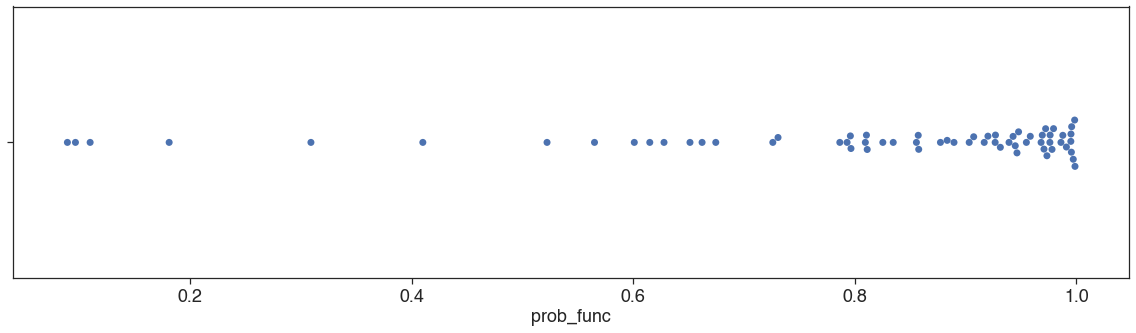

In [53]:
df = pd.read_csv('vae_sample625_cutinase_signalp.txt', delimiter='\t', header=1)
df['prob_func'] = 1 - df['OTHER']
sns.set(font='helvetica', context='notebook', font_scale=1.5, style='ticks')
fig, ax = plt.subplots(figsize=(20,5))
ax.tick_params(axis='both', which='major', labelsize=18)
sns.swarmplot(df['prob_func'], size=7)
print(np.average(df['prob_func'].values), np.std(df['prob_func'].values))

0.953940234375 0.12265200124446887


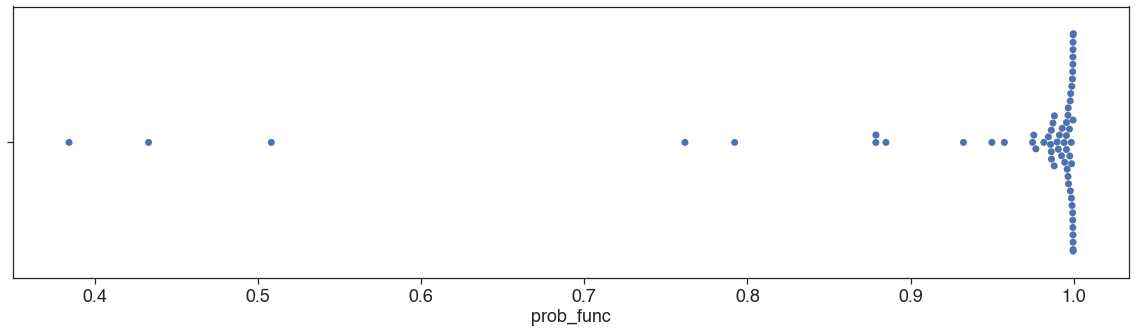

In [54]:
df = pd.read_csv('vae_sample625_random_signalp.txt', delimiter='\t', header=1)
df['prob_func'] = 1 - df['OTHER']
sns.set(font='helvetica', context='notebook', font_scale=1.5, style='ticks')
fig, ax = plt.subplots(figsize=(20,5))
ax.tick_params(axis='both', which='major', labelsize=18)
sns.swarmplot(df['prob_func'], size=7)
print(np.average(df['prob_func'].values), np.std(df['prob_func'].values))